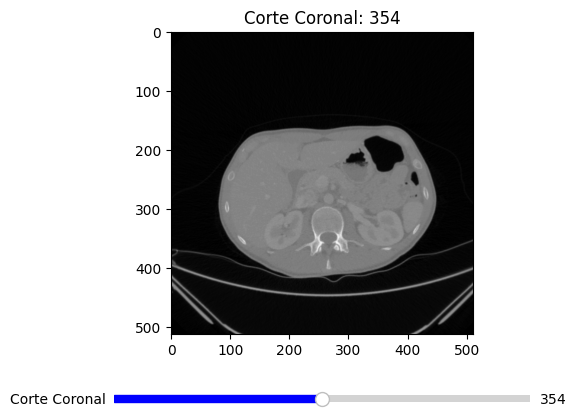

In [9]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Cargar archivos DICOM
def load_dicom_files(folder):
    dicom_files = []
    for filename in os.listdir(folder):
        if filename.endswith('.dcm'):
            dicom_files.append(pydicom.dcmread(os.path.join(folder, filename)))
    return dicom_files

# Asegurar el orden correcto de las imágenes
def sort_slices(dicom_files):
    return sorted(dicom_files, key=lambda s: float(s.SliceLocation))

# Crear una imagen 3D de los cortes
def create_3d_image(slices):
    img_shape = list(slices[0].pixel_array.shape)
    img_shape.append(len(slices))
    img3d = np.zeros(img_shape)
    
    for i, s in enumerate(slices):
        img2d = s.pixel_array
        img3d[:, :, i] = img2d
    
    return img3d, img_shape

# Obtener el corte en el plano especificado
def slice_det(image, index, plane):    
    if plane == 0: # Axial
        return image[index, :, :]
    elif plane == 1: # Sagital
        return image[:, index, :]
    elif plane == 2: # Coronal
        return image[:, :, index]

# Función principal para mostrar los cortes coronales con slider
def show_coronal_slices(img3d, img_shape):
    # Definir el plano coronal
    plane = 2  # 0: Axial, 1: Sagital, 2: Coronal

    # Rango del slider basado en el número de cortes coronales
    max_index = img_shape[plane] - 1

    # Crear la figura y los ejes
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.25, bottom=0.25)
    
    # Mostrar el primer corte coronal
    initial_index = max_index // 2
    img_display = slice_det(img3d, initial_index, plane)
    img_plot = ax.imshow(img_display, cmap='gray')
    ax.set_title(f"Corte Coronal: {initial_index}")

    # Crear el eje para el slider
    ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03])
    slider = Slider(
        ax=ax_slider,
        label='Corte Coronal',
        valmin=0,
        valmax=max_index,
        valinit=initial_index,
        valstep=1,
        color='blue'
    )

    # Variable para controlar si se ha fijado el corte
    slice_fixed = {'fixed': False}

    # Función de actualización del slider
    def update(val):
        if not slice_fixed['fixed']:
            index = int(slider.val)
            img = slice_det(img3d, index, plane)
            img_plot.set_data(img)
            ax.set_title(f"Corte Coronal: {index}")
            fig.canvas.draw_idle()

    slider.on_changed(update)

    # Función para manejar eventos de teclado
    def on_key(event):
        if event.key == 'x':
            slice_fixed['fixed'] = True
            slider.ax.set_visible(False)  # Ocultar el slider
            fig.canvas.draw_idle()
            print(f"Corte coronal fijado en el índice: {int(slider.val)}")
            # Aquí puedes agregar el procesamiento adicional que necesites
            # Por ejemplo:
            # selected_slice = slice_det(img3d, int(slider.val), plane)
            # procesar_corte(selected_slice)

    fig.canvas.mpl_connect('key_press_event', on_key)

    plt.show()

# Ruta a la carpeta que contiene los archivos DICOM
folder_path = 'Paciente 2 - 2'

# Cargar y procesar los archivos DICOM
dicom_files = load_dicom_files(folder_path)
dicom_files_sorted = sort_slices(dicom_files)
img3d, img_shape = create_3d_image(dicom_files_sorted)

# Mostrar los cortes coronales con interactividad
show_coronal_slices(img3d, img_shape)


In [8]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Cargar archivos DICOM
def load_dicom_files(folder):
    dicom_files = []
    for filename in os.listdir(folder):
        if filename.endswith('.dcm'):
            dicom_files.append(pydicom.dcmread(os.path.join(folder, filename)))
    return dicom_files

# Asegurar el orden correcto de las imágenes
def sort_slices(dicom_files):
    return sorted(dicom_files, key=lambda s: s.SliceLocation)

# Crear una imagen 3D de los cortes
def create_3d_image(slices):
    img_shape = list(slices[0].pixel_array.shape)
    img_shape.append(len(slices))
    img3d = np.zeros(img_shape)
    
    for i, s in enumerate(slices):
        img2d = s.pixel_array
        img3d[:, :, i] = img2d
    
    return img3d, img_shape

# Mostrar cortes coronales, axiales y sagitales
def display_slices(img3d, img_shape, slice_index):
    ax1.imshow(img3d[:, :, slice_index], cmap='gray')
    ax1.set_title(f'Corte Coronal: {slice_index}')
    ax1.axis('off')

    ax2.imshow(img3d[:, img_shape[1] // 2, :], cmap='gray')
    ax2.set_title('Corte Sagital')
    ax2.axis('off')

    ax3.imshow(img3d[img_shape[0] // 2, :, :].T, cmap='gray')
    ax3.set_title('Corte Axial')
    ax3.axis('off')

    plt.draw()

# Función para actualizar los cortes
def update(val):
    slice_index = int(slider.val)
    display_slices(img3d, img_shape, slice_index)

# Main
folder = 'Paciente 2 - 2'
dicom_files = load_dicom_files(folder)
slices = sort_slices(dicom_files)
img3d, img_shape = create_3d_image(slices)

# Comprobar si hay cortes
if len(slices) == 0:
    raise ValueError("No se encontraron cortes DICOM válidos en la carpeta.")

# Crear la figura y los subgráficas
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 10))
ax3 = fig.add_subplot(224)  # Añadir el cuarto subplot manualmente
plt.subplots_adjust(bottom=0.25)

# Mostrar el primer corte
slice_index = img_shape[2] // 2
display_slices(img3d, img_shape, slice_index)

# Slider para seleccionar el índice del corte
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03])  # [left, bottom, width, height]
slider = Slider(ax_slider, 'Slice Index', 0, len(slices) - 1, valinit=slice_index, valstep=1)

# Conectar el slider a la función de actualización
slider.on_changed(update)

plt.show()




## Función para seleccionar puntos
#def select_points(event):
#    if event.inaxes:
#        x, y = event.xdata, event.ydata
#        points.append((x, y))
#        plt.scatter(x, y, c='red')
#        plt.draw()
#
## Interpolación con B-Splines
#def interpolate_bspline(points, degree=3):
#    if len(points) < degree + 1:
#        return None
#
#    points = np.array(points)
#    tck, u = splprep(points.T, k=degree, s=0)
#    x_new, y_new = splev(np.linspace(0, 1, 100), tck)
#    return x_new, y_new
#
## Graficar la curva interpolada
#def plot_interpolated_curve(x_new, y_new):
#    plt.plot(x_new, y_new, 'b-', label='Curva Interpolada')
#    plt.legend()
#
## Medir altura y graficar resultados
#def measure_height(points):
#    heights = []
#    for i in range(len(points)-1):
#        height = np.linalg.norm(np.array(points[i]) - np.array(points[i+1]))
#        heights.append(height)
#    return heights


#points = []
#fig, ax = plt.subplots()
#fig.canvas.mpl_connect('button_press_event', select_points)
#
#plt.imshow(dicom_files[slice_index].pixel_array, cmap='gray')
#plt.title('Seleccione puntos del contorno')
#plt.axis('off')
#plt.show()
#
## Interpolación
#if len(points) > 0:
#    x_new, y_new = interpolate_bspline(points)
#    plot_interpolated_curve(x_new, y_new)
#
#    # Medir altura
#    heights = measure_height(points)
#    plt.plot(heights)
#    plt.title('Altura a lo largo del eje izquierda-derecha')
#    plt.xlabel('Punto')
#    plt.ylabel('Altura (unidades)')
#    plt.show()


KeyboardInterrupt: 